# 数据集成与可视化 

In [1]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants

from spdm.core.file import File
from spdm.core.function import Function
from spdm.view import sp_view


## 示例: 平衡分析

In [2]:
astra_profiles = pd.read_excel("./data/15MA Inductive at burn-ASTRA.xls", sheet_name=1, header=10, usecols="B:BN")
eqdsk_file=File(f"file+geqdsk://./data/g900003.00230_ITER_15MA_eqdsk16VVHR.txt#equilibrium").entry

2024-06-04 21:28:29,155 [    spdm]  VERBOSE: Load module spdm.plugins.data.plugin_geqdsk


In [3]:
from fytok.modules.equilibrium import Equilibrium

2024-06-04 21:28:29,215 [   fytok]  VERBOSE: Failed to import IMAS ontology: No module named 'fytok.ontology.imas_lastest'
2024-06-04 21:28:29,216 [   fytok]     INFO: Failed to import IMAS wrapper. Using dummy ontology as fallback.
2024-06-04 21:28:29,224 [   fytok]     INFO: 
###################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/

 Copyright (c) 2021-present Zhi YU @ Institute of Plasma Physics Chinese Academy of Sciences 
            
 version = 0.4.1  (spdm=beta extension=0.2.3.dev0+g2cc21ff.d20240223)

 Run by salmon at 2024-06-04T21:28:29.215148.
 Job ID: fytok_salmon_surface_14528

###################################################################################################



In [4]:
equilibrium = Equilibrium(f"file+geqdsk://./data/g900003.00230_ITER_15MA_eqdsk16VVHR.txt#equilibrium")

2024-06-04 21:28:29,409 [   fytok]  VERBOSE: Load module fytok.plugins.modules.equilibrium.fy_eq
2024-06-04 21:28:29,471 [   fytok]  VERBOSE: Initialize module fy_eq-0_0_0 


2024-06-04 21:28:29,482 [   fytok]  VERBOSE: Load module spdm.view.view_matplotlib


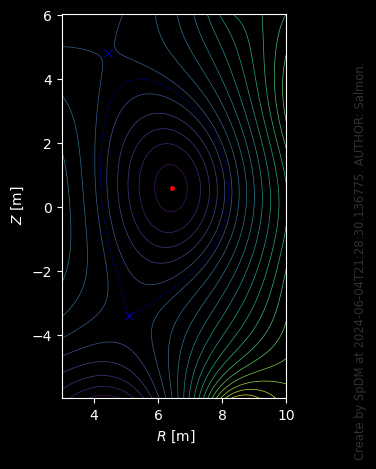

In [5]:
fig=sp_view.display(equilibrium)

In [6]:
eq=equilibrium.time_slice.current
eq_profiles_2d = eq.profiles_2d
eq_profiles_1d = eq.profiles_1d


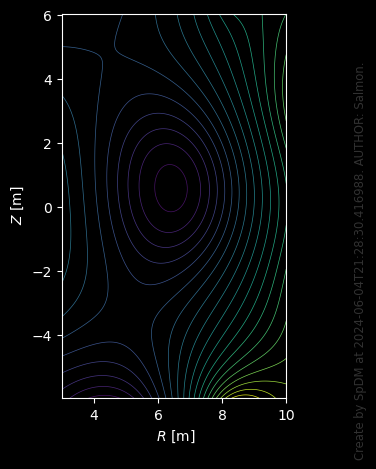

In [7]:
fig = sp_view.display(eq_profiles_2d.psi)

2024-06-04 21:28:31,330 [   fytok]  WARNING: /home/salmon/workspace/fytok/python/fytok/plugins/modules/equilibrium/fy_eq/fy_eq.py:234:find_surfaces_by_psi: Can not find surf at -1.1189676199999994  


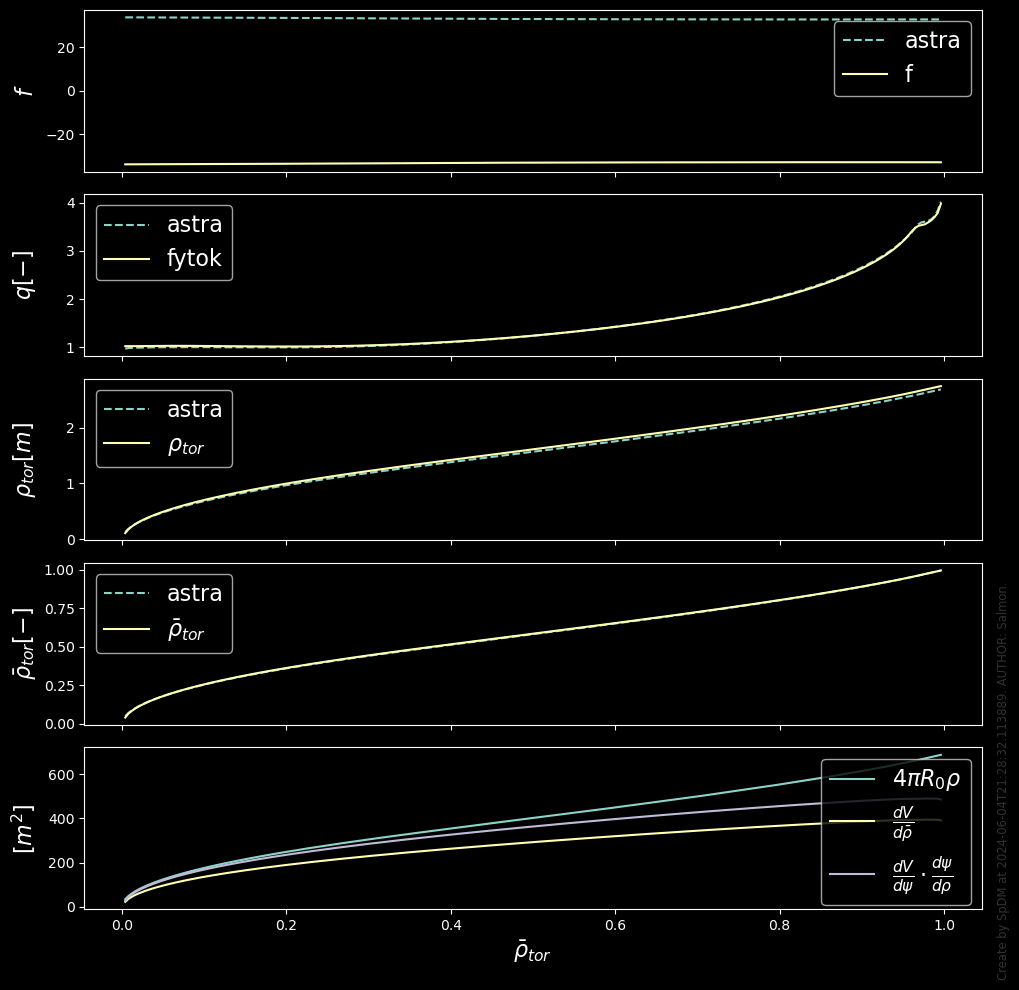

In [8]:
R0 = equilibrium.time_slice.current.vacuum_toroidal_field.r0
psi_axis = equilibrium.time_slice.current.global_quantities.psi_axis
psi_boundary = equilibrium.time_slice.current.global_quantities.psi_boundary
eq_profiles_1d = equilibrium.time_slice.current.profiles_1d

fig = sp_view.plot(
    eq_profiles_1d.psi_norm[1:-1],
    (
        [
            (
                Function(
                    eqdsk_file.get("equilibrium/time_slice/0/profiles_1d/psi_norm"),
                    -eqdsk_file.get("equilibrium/time_slice/0/profiles_1d/f"),
                ),
                {"label": r"astra", "$matplotlib": {"linestyle": "dashed"}},
            ),
            (eq_profiles_1d.f, "f"),
        ],
        {"y_label": r"$f$"},
    ),
    (
        [
            (
                Function(astra_profiles["xq"].values, astra_profiles["q"].values)(eq_profiles_1d.rho_tor_norm),
                {"label": r"astra", "$matplotlib": {"linestyle": "dashed"}},
            ),
            (eq_profiles_1d.q, {"label": r"fytok"}),
        ],
        {"y_label": r"$q [-]$"},
    ),
    (
        [
            (
                Function(astra_profiles["Fp"].values, astra_profiles["rho"].values),
                {"label": r"astra", "$matplotlib": {"linestyle": "dashed"}},
            ),
            (eq_profiles_1d.rho_tor),
        ],
        {
            "y_label": r"$\rho_{tor}[m]$",
        },
    ),
    (
        [
            (
                Function(astra_profiles["Fp"].values, astra_profiles["x"].values),
                {"label": r"astra", "$matplotlib": {"linestyle": "dashed"}},
            ),
            (eq_profiles_1d.rho_tor_norm),
        ],
        {
            "y_label": r"$\bar{\rho}_{tor}[-]$",
        },
    ),
    (
        [
            Function(
                astra_profiles["Fp"].values,
                4 * (scipy.constants.pi**2) * R0 * astra_profiles["rho"].values,
                label=r"$4\pi R_0 \rho$",
            ),
            (eq_profiles_1d.dvolume_drho_tor, {"label": r"$\frac{dV}{d\bar{\rho}}$"}),
            (
                (scipy.constants.pi * 2.0) * eq_profiles_1d.dvolume_dpsi * eq_profiles_1d.dpsi_drho_tor,
                r"$\frac{dV}{d\psi} \cdot \frac{d\psi}{d\rho}$",
            ),
        ],
        {"y_label": r"$[m^2]$"},
    ),
    x_label=r"$\bar{\rho}_{tor}$",
)

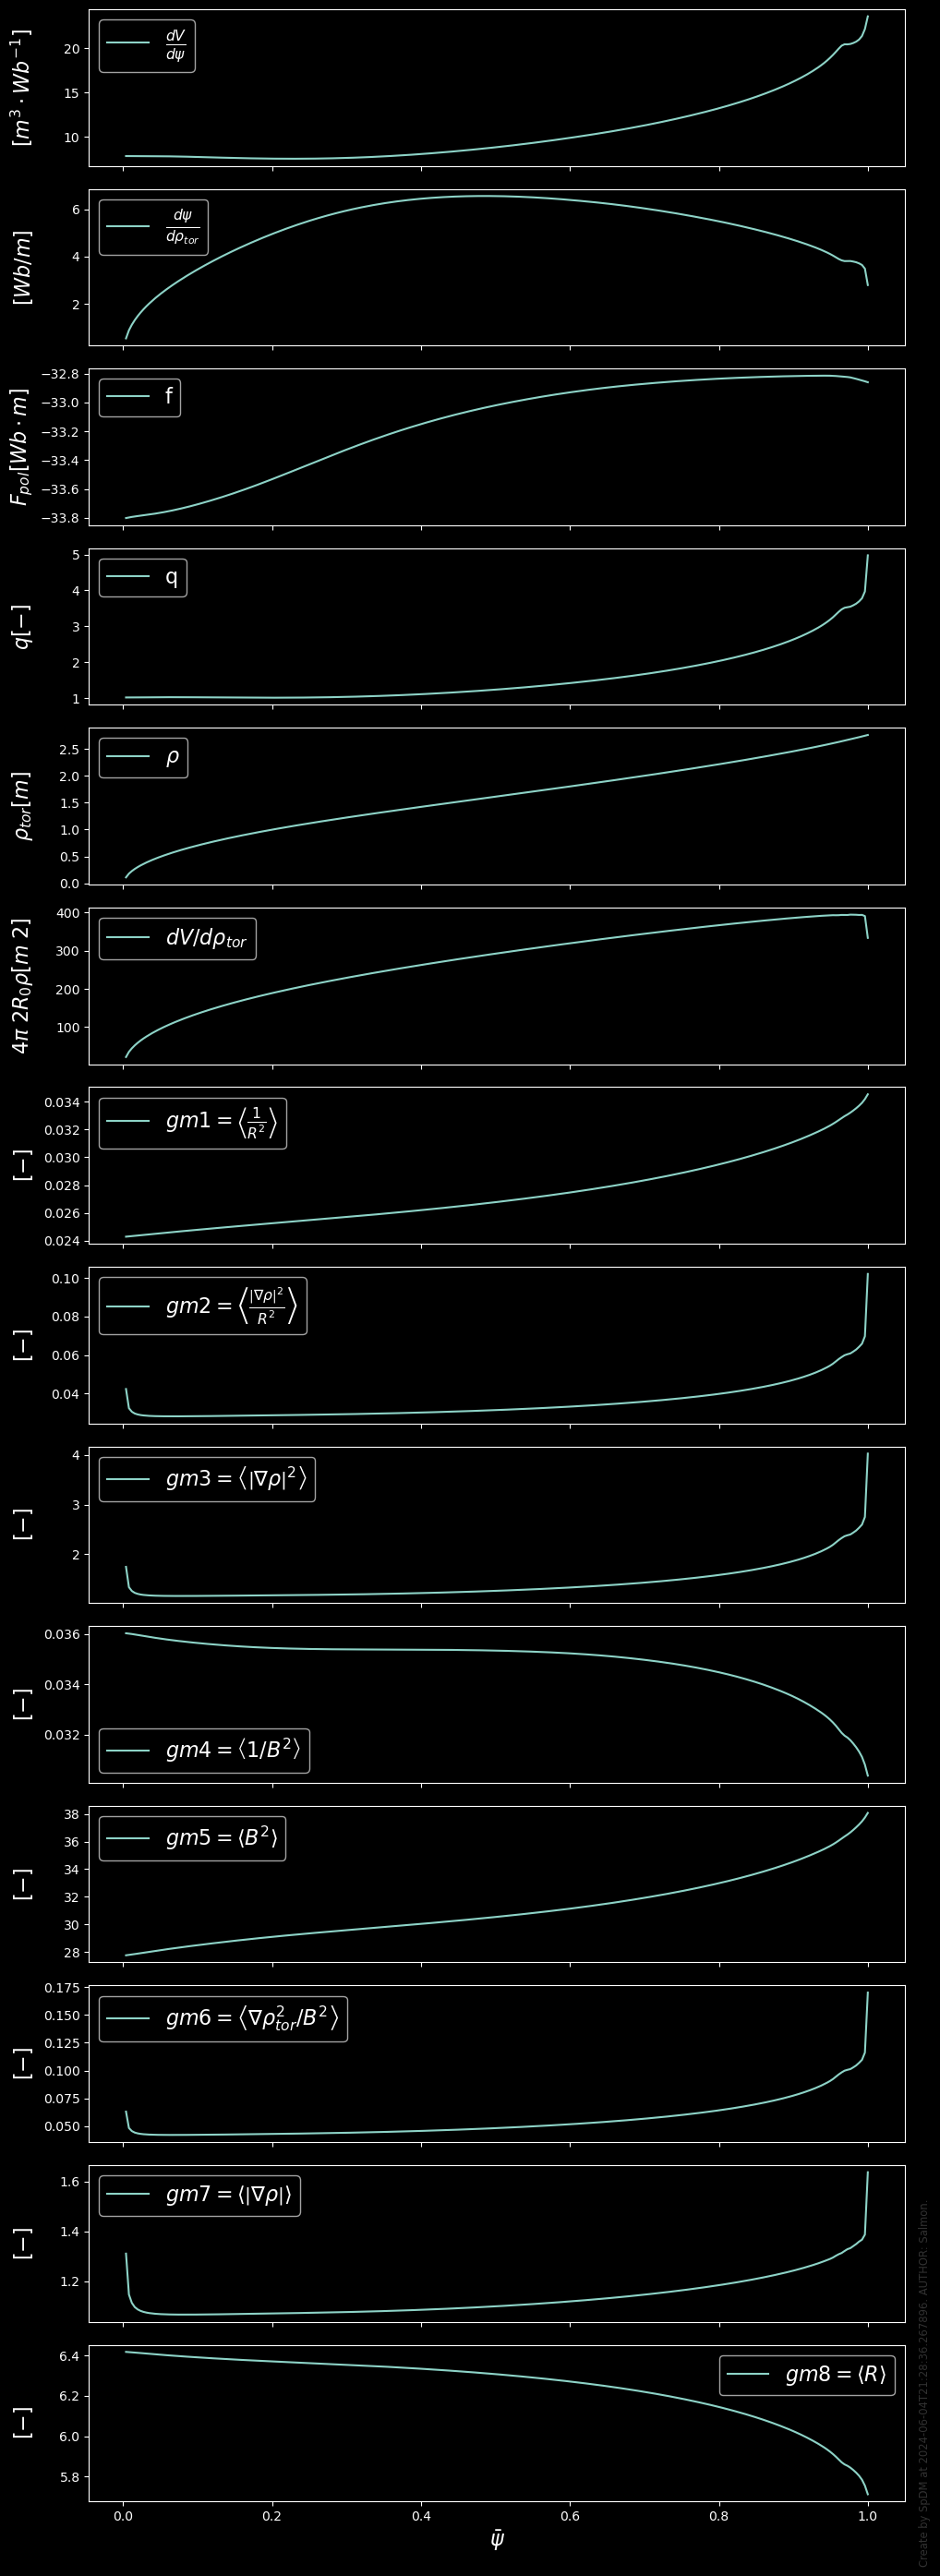

In [9]:
eq_profiles_1d = equilibrium.time_slice.current.profiles_1d
fig = sp_view.plot(  # plot tokamak geometric profile
    eq_profiles_1d.grid.psi_norm[1:],
    (eq_profiles_1d.dvolume_dpsi, r"$\frac{dV}{d\psi}$"),
    (eq_profiles_1d.dpsi_drho_tor, r"$\frac{d\psi}{d\rho_{tor}}$"),
    (eq_profiles_1d.f, {"y_label": r"$F_{pol} [Wb\cdot m]$"}),
    (eq_profiles_1d.q, {"y_label": r"$q [-]$"}),
    ((eq_profiles_1d.rho_tor, r"$\rho$"), {"y_label": r"$\rho_{tor}[m]$"}),
    # ((eq_profiles_1d.rho_tor_norm, r"$\bar{\rho}$"), {"y_label": r"[-]"}),
    ((eq_profiles_1d.dvolume_drho_tor, r"$dV/d\rho_{tor}$"), {"y_label": r"$4\pi ^ 2 R_0 \rho[m ^ 2]$"}),
    (eq_profiles_1d.gm1, r"$gm1=\left<\frac{1}{R^2}\right>$"),
    (eq_profiles_1d.gm2, r"$gm2=\left<\frac{\left|\nabla \rho\right|^2}{R^2}\right>$"),
    (eq_profiles_1d.gm3, r"$gm3=\left<\left|\nabla \rho\right|^2\right>$"),
    (eq_profiles_1d.gm4, r"$gm4=\left<1/B^2\right>$"),
    (eq_profiles_1d.gm5, r"$gm5=\left<B^2\right>$"),
    (eq_profiles_1d.gm6, r"$gm6=\left<\nabla \rho_{tor}^2/ B^2 \right>$"),
    (eq_profiles_1d.gm7, r"$gm7=\left<\left|\nabla \rho\right|\right>$"),
    (eq_profiles_1d.gm8, r"$gm8=\left<R\right>$"),
    x_label=r"\bar{\psi}",
)

# 示例: Tokamak 装置信息

In [10]:
from fytok.tokamak import Tokamak

In [11]:
tokamak = Tokamak(
    device="iter",
    shot=900003,
    # equilibrium=f"file+geqdsk://./data/g900003.00230_ITER_15MA_eqdsk16VVHR.txt#equilibrium",
)

2024-06-04 21:28:38,863 [   fytok]  VERBOSE: Load module spdm.plugins.data.plugin_xml


## 展示概要信息

展示模拟的概要信息，包括 
- 装置名称、炮号、运行序号，
- 使用者、运行环境、运行时间、采用的 Ontology 版本
- 调用的模块信心

In [12]:
print(tokamak.brief_summary)

2024-06-04 21:28:38,889 [   fytok]  VERBOSE: Load module fytok.plugins.modules.transport_solver_numerics.fy_trans
2024-06-04 21:28:38,891 [   fytok]  VERBOSE: Initialize module fy_trans-0_0_0 
2024-06-04 21:28:38,892 [   fytok]  VERBOSE: Initialize module fy_eq-0_0_0 
2024-06-04 21:28:38,895 [   fytok]  VERBOSE: Initialize module default-0_0_0 
2024-06-04 21:28:38,898 [   fytok]  VERBOSE: Initialize module default-0_0_0 
2024-06-04 21:28:38,900 [   fytok]  VERBOSE: Initialize module default-0_0_0 

###################################################################################################

    ______      _____     _
   / ____/_  __|_   _|__ | | __
  / /_  / / / /  | |/ _ \| |/ /
 / __/ / /_/ /   | | (_) |   <
/_/    \__, /    |_|\___/|_|\_\
      /____/

 Copyright (c) 2021-present Zhi YU @ Institute of Plasma Physics Chinese Academy of Sciences 
            
 version = 0.4.1  (spdm=beta extension=0.2.3.dev0+g2cc21ff.d20240223)

 Run by salmon at 2024-06-04T21:28:29.215148.
 J

## 可视化
### 适用于 JupyterLab 环境的可视化接口
FyTok 提供了适用于 JupyterLab 环境的可视化接口，`sp_view.display()`调用。默认情况下，`Tokamak` 会将能够获取到的信息尽可能绘制到一张图上。如下图，展示了 pf_active 极向场线圈、magnetic 磁场探针，wall.limiter 壁, interferometer 干涉仪的几何信息，磁平衡信息给出了二维磁面的等高线，最外层磁面、磁轴、X-point等信息。

```{note} 
具有 IDS 可视化语义的 IDS 都应支持 `sp_view.display()` 可视化，如 wall,pf_active,equilibrium。关于可视化库 spdm.view 的进一步细节请参考第二部分 SpDM 的可视化章节。
```

2024-06-04 21:28:38,938 [   fytok]  WARNING: /home/salmon/workspace/fytok/python/fytok/tokamak.py:233:__view__: Failed to get FyEqAnalyze.__view__ ! Unable to determine mesh type! {'type': <tags.not_found: 0>} 


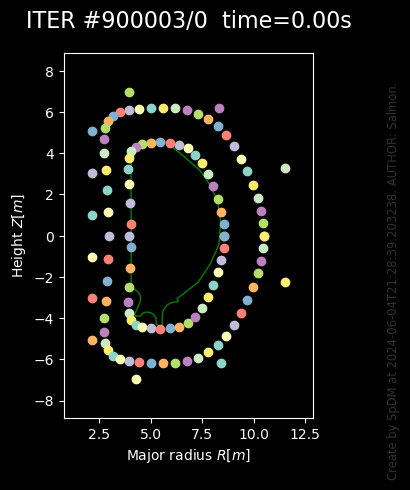

In [13]:
fig=sp_view.display(tokamak)

## 将可视化结果输出为图像文件

通过指定输出文件路径 `output=f"output/{tok.tag}_rz.svg"`，可以将可视化结果以文件的形式保存。

2024-06-04 21:28:40,000 [   fytok]  WARNING: /home/salmon/workspace/fytok/python/fytok/tokamak.py:233:__view__: Failed to get FyEqAnalyze.__view__ ! Unable to determine mesh type! {'type': <tags.not_found: 0>} 
2024-06-04 21:28:40,376 [   fytok]    DEBUG: /home/salmon/workspace/fytok/SpDM/python/spdm/view/view_matplotlib.py:95:_figure_post: Write figure to  output/iter_900003_0_000000_rz.svg


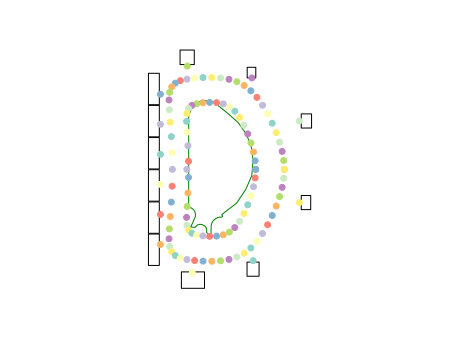

In [14]:
from IPython.core.display import SVG

sp_view.display(tokamak, title=tokamak.title, output=f"output/{tokamak.tag}_rz.svg")

SVG(f"output/{tokamak.tag}_rz.svg")